# task 1:

Visualize the income distributions BasePay and TotalPayBenefits for the year 2014!

In [ ]:
## Important to Configure the graphic for the tasks

# Matplotlib config
%matplotlib inline
#1
#Turn on SVG display
%config InlineBackend.figure_formats = ['svg']

# Define size
%config InlineBackend.rc = {'figure.figsize': (5.0, 3.0)}

# Data convert and read in 

Therefore, the type of the column is "String" and if we want to convert the data type to a number, 
we have to specify it .

For this we can create a function that does this for us, here `convert_to_float`. This is applied to each value, it first tries to convert the value (variable s, of type string) into a float. If an error occurs (`ValueError`), the value NaN is entered instead.

In [ ]:
import numpy as np   ## 
import pandas as pd   ## for pandas
import seaborn as sns  ##
import matplotlib.pyplot as plt ## for the data plots

def convert_to_float(s):
    try:
        return float(s)
    except ValueError:
        return np.nan  ## constant from numpy libary  "Not a Number" value

df = pd.read_csv("../DataAnalysSolary/Salaries.csv", 
                 converters = {'BasePay': convert_to_float, ## converter Option turn the given value
                              'OvertimePay': convert_to_float,
                              'OtherPay': convert_to_float,
                              'Benefits': convert_to_float},
                 dtype = {'Status': str , 'Notes': str}   )
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [58]:
# To visualize the income distributionn,we extract the Series Year of 2014
## from the dataframe df

data_2014 = df[df['Year'] == 2014]


The calculation `(data_2014['BasePay'].max() - data_2014['BasePay'].min()) / binwidth` determines the number of bins based on the range of values in the 'BasePay' column and the desired bin width.

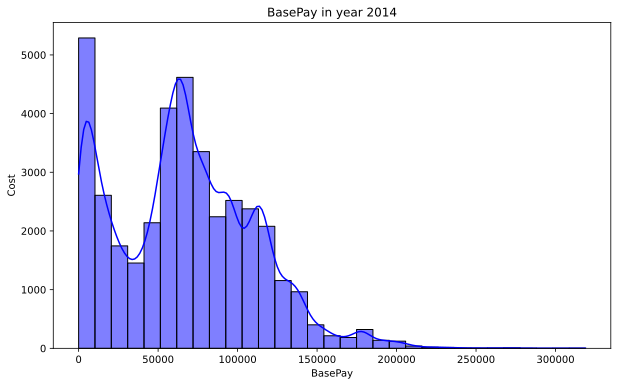

In [ ]:
## set binwidth
binwidth = 10000

# Plot the distribution of BasePay
plt.figure(figsize=(10, 6)) # width and height
sns.histplot(data=data_2014, x='BasePay', kde= True, color='blue',  bins=int((data_2014['BasePay'].max() - data_2014['BasePay'].min()) / binwidth))
## dive 
plt.xlabel('BasePay')
plt.ylabel('Cost')
plt.title('BasePay in year 2014')
plt.show() #plot the graph 

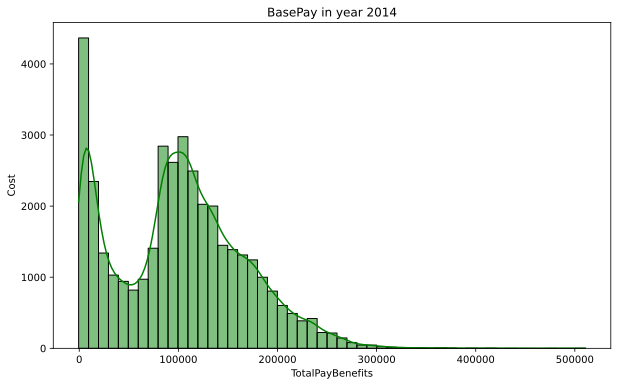

In [ ]:
## set binwidth
binwidth = 10000

# Plot the distribution of BasePay
plt.figure(figsize=(10, 6))
sns.histplot(data=data_2014, x='TotalPayBenefits', kde=True, color='green', bins=int((data_2014['TotalPayBenefits'].max() - data_2014['TotalPayBenefits'].min()) / binwidth))
plt.xlabel('TotalPayBenefits')
plt.ylabel('Cost')
plt.title('BasePay in year 2014')
plt.show()

## task 2

We want to move to San Francisco. What public job should we take to earn as much money as possible?

So determine the 10 most common jobs (grouped by the `JobTitle` column) and plot the average total income (TotalPayBenefits) for the year 2014 for each JobTitle in a bar chart. What job should we apply for?

In [ ]:
"""Personal Notes"""
.groupby("JobTitle")\:sort Data grouped by Jobs ( which one payes the highest wage?)
.agg(count = ("Id", len), avgPay = ("TotalPayBenefits", np.mean)): Which colums (filtered)
.sort_values("count", ascending = False)\: Sort count to a descending order (we need .sort values)
.iloc[:10]   limited output of rows CAN be higher then 10, but we want 10 rows to visualize..



In [119]:

df_jobs = df_2014\
    .groupby("JobTitle")\
    .agg(count = ("Id", len), avgPay = ("TotalPayBenefits", np.mean))\
    .sort_values("count", ascending = False)\
    .iloc[:10]\
    .reset_index()
df_jobs.head(10)

,JobTitle,count,avgPay
0,Transit Operator,2479,86718.995478
1,Special Nurse,1478,36159.035528
2,Registered Nurse,1234,151715.116759
3,Public Svc Aide-Public Works,916,10705.586725
4,Firefighter,815,177701.855018
5,Custodian,804,70346.361915
6,Police Officer 3,783,170390.134815
7,Recreation Leader,690,7356.768667
8,Patient Care Assistant,652,66028.341871
9,Deputy Sheriff,617,149497.479157


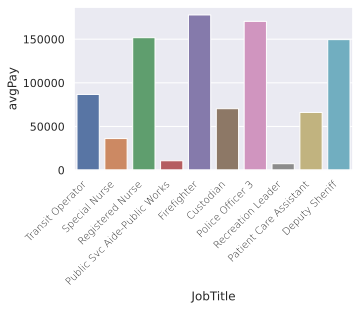

In [113]:
sns.set()  ##seaplot libary , better for multiply columns

ax = sns.barplot(x = df_jobs.index, y = df_jobs["avgPay"])
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
);

Answer: The best payed  public Job is the #Firefighter 

## task 3

a) Create a bar chart with different bars:

- Average income (TotalPayBenefits) in 2011
- Average income (TotalPayBenefits) in 2012
- Average income (TotalPayBenefits) in 2013
- Average income (TotalPayBenefits) in 2014

<AxesSubplot:xlabel='Year', ylabel='avgPay'>

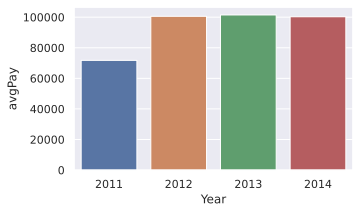

In [150]:
df_grouped = df.groupby("Year").agg(avgPay = ("TotalPayBenefits", np.mean))
sns.barplot(x = df_grouped.index, y = df_grouped["avgPay"])

<AxesSubplot:xlabel='Year', ylabel='value'>

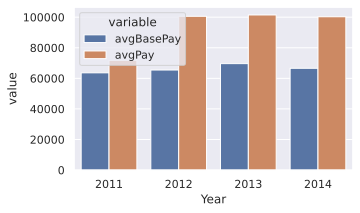

In [160]:
df_grouped = df\
    .groupby("Year")\
    .agg(avgPay = ("TotalPayBenefits", np.mean), avgBasePay = ("BasePay", np.mean))\
    .reset_index()\
    .melt(id_vars = ["Year"])

sns.barplot(x = df_grouped["Year"], 
            y = df_grouped["value"], 
            hue = df_grouped["variable"], 
            hue_order = ["avgBasePay", "avgPay"])